## Lista 3


In [1]:
from sympy import *
from sympy.plotting import *

init_printing()

x, y, z, ld, a = symbols("x y z lambda a", real=True)

### Zadanie 1


In [2]:
fun_z = 4 - sqrt(x**2 + y**2)
fun_z

In [3]:
fun_y = x + 1
fun_y

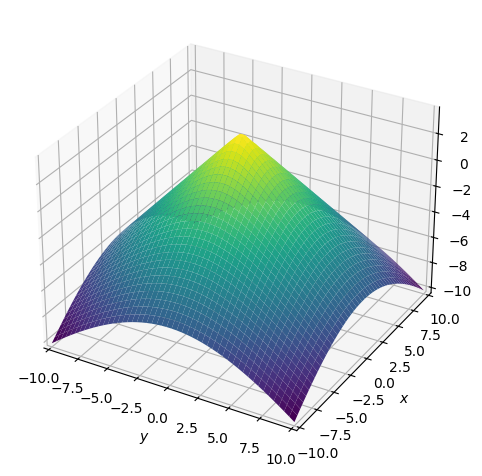

In [4]:
plt1 = plot3d(fun_z)

### I Sposób


In [5]:
fun_g = fun_y - y

In [6]:
fun_L = fun_z + ld * fun_g
fun_L

Wyznaczanie pochodnych pierwszego stopnia


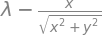

In [7]:
fun_L_diff_x = diff(fun_L, x)
fun_L_diff_x

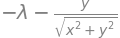

In [8]:
fun_L_diff_y = diff(fun_L, y)
fun_L_diff_y

In [9]:
fun_L_diff_lbda = diff(fun_L, ld)
fun_L_diff_lbda

Wyznaczanie punktów krytycznych z warunku koniecznego


In [10]:
crit_point = solve([fun_L_diff_x, fun_L_diff_y, fun_L_diff_lbda], [x, y, ld])
crit_point
m_x = crit_point[0]
m_x

In [11]:
L_hesjan = Matrix(
    [
        [0, diff(fun_g, x), diff(fun_g, y)],
        [diff(fun_g, x), diff(fun_L, x, x), diff(fun_L, x, y)],
        [diff(fun_g, y), diff(fun_L, y, x), diff(fun_L, y, y)],
    ]
)
L_hesjan

⎡0        1             -1     ⎤
⎢                              ⎥
⎢        2                     ⎥
⎢       x                      ⎥
⎢    ─────── - 1               ⎥
⎢     2    2                   ⎥
⎢    x  + y            x⋅y     ⎥
⎢1   ────────────  ────────────⎥
⎢       _________           3/2⎥
⎢      ╱  2    2   ⎛ 2    2⎞   ⎥
⎢    ╲╱  x  + y    ⎝x  + y ⎠   ⎥
⎢                              ⎥
⎢                      2       ⎥
⎢                     y        ⎥
⎢                  ─────── - 1 ⎥
⎢                   2    2     ⎥
⎢        x⋅y       x  + y      ⎥
⎢-1  ────────────  ────────────⎥
⎢             3/2     _________⎥
⎢    ⎛ 2    2⎞       ╱  2    2 ⎥
⎣    ⎝x  + y ⎠     ╲╱  x  + y  ⎦

In [12]:
zaokraglony_L_hesjan = Matrix(
    [
        [0, diff(fun_g, x), diff(fun_g, y)],
        [diff(fun_g, x), diff(fun_L, x, x), diff(fun_L, x, y)],
        [diff(fun_g, y), diff(fun_L, y, x), diff(fun_L, y, y)],
    ]
)

zaokraglony_L_hesjan

⎡0        1             -1     ⎤
⎢                              ⎥
⎢        2                     ⎥
⎢       x                      ⎥
⎢    ─────── - 1               ⎥
⎢     2    2                   ⎥
⎢    x  + y            x⋅y     ⎥
⎢1   ────────────  ────────────⎥
⎢       _________           3/2⎥
⎢      ╱  2    2   ⎛ 2    2⎞   ⎥
⎢    ╲╱  x  + y    ⎝x  + y ⎠   ⎥
⎢                              ⎥
⎢                      2       ⎥
⎢                     y        ⎥
⎢                  ─────── - 1 ⎥
⎢                   2    2     ⎥
⎢        x⋅y       x  + y      ⎥
⎢-1  ────────────  ────────────⎥
⎢             3/2     _________⎥
⎢    ⎛ 2    2⎞       ╱  2    2 ⎥
⎣    ⎝x  + y ⎠     ╲╱  x  + y  ⎦

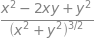

In [13]:
delta_2 = L_hesjan.det().simplify()
delta_2

In [14]:
delta_2_p1 = delta_2.subs([(x, m_x[0]), (y, m_x[1])])
delta_2_p1

In [15]:
# wartość ekstremum w punkcie p1fo
f_p1 = fun_z.subs([(x, m_x[0]), (y, m_x[1])])
display(f_p1.evalf(5))
display(f_p1)
# 2 > 0 maksimum warunkowe

Ekstremum w punkcie (-1/2, 1/2) o wartości 3.293


### II Sposób


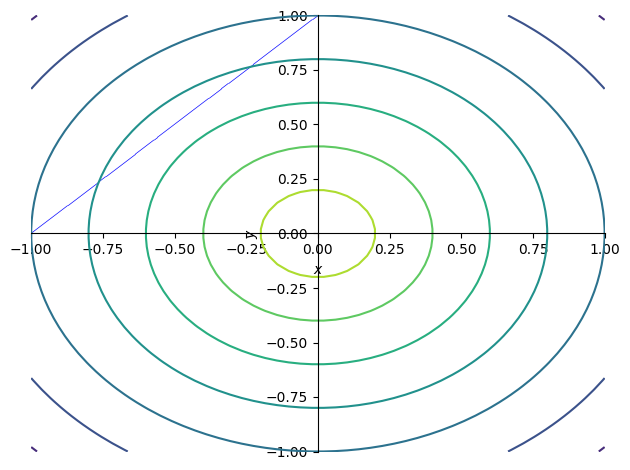

In [16]:
plt2 = plot_implicit(
    Eq(fun_g, 0), (x, -1, 1), (y, -1, 1), show=False, xlim=[-1, 1], ylim=[-1, 1]
)
plt3 = plot_contour(fun_z, (x, -1, 1), (y, -1, 1), show=False)
plt2.append(plt3[0])
plt2.show()

In [17]:
left_fun = (a - 4) ** 2
display(left_fun)

f = (fun_z - 4) ** 2
display(f)
right_fun = f.subs(y, fun_y)
display(right_fun)

tmp_fun = expand(right_fun - left_fun)
display(tmp_fun)

Równanie kwadratowe ma jedno rozwiązanie tylko i wyłącznie dla delty = 0


In [18]:
delta = 4 - 4 * 2 * (-(a**2) + 8 * a - 15)
display(delta)

a_results = solve(delta, a)
display(a_results)

In [19]:
rdy_funx = tmp_fun.subs(a, a_results[0])
display(rdy_funx)
pktx = solve(rdy_funx)
display(pktx)

In [20]:
rdy_funy = tmp_fun.subs(a, a_results[1])
display(rdy_funy)
pkty = solve(rdy_funy)
display(pkty)

In [21]:
pkt_val = fun_z.subs({x: pktx[0], y: pkty[0]})
display(pkt_val)
display(pkt_val.evalf(5))

### III Sposób - nie zrobiony


### Zadanie 2


In [22]:
wzorFxy = 5 * x**4 - y**3 + 2 * x**2 * y - x**2 + 2 * y**2
wzorFxy

In [23]:
diff1x = diff(wzorFxy, x)
display(diff1x)
diff1x.subs({x: 1.11, y: 1.22})

In [24]:
diff1y = diff(wzorFxy, y)
display(diff1y)
diff1y.subs({x: 2.22, y: 2.11})

In [25]:
diff3xxx = diff(wzorFxy, x, x, x)
display(diff3xxx)
diff3xxx.subs({x: 3.33, y: 4.33})

In [26]:
diff3xxy = diff(wzorFxy, x, x, y)
display(diff3xxy)
diff3xxy.subs({x: 4.44, y: 3.44})

In [27]:
diff3yxy = diff(wzorFxy, y, x, y)
display(diff3yxy)
diff3yxy.subs({x: 3.33, y: 4.33})

In [28]:
diff3yyx = diff(wzorFxy, y, y, x)
display(diff3yyx)
diff3yyx.subs({x: 4.44, y: 3.44})

### Zadanie 3


In [29]:
diff1x = diff(wzorFxy, x)
diff1x

In [30]:
diff1xx = diff(wzorFxy, x, x)
diff1xy = diff(wzorFxy, x, y)
diff1yx = diff(wzorFxy, y, x)
diff1yy = diff(wzorFxy, y, y)

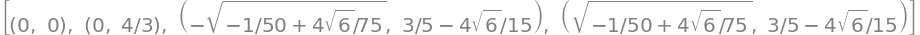

In [31]:
p_krytyczne = solve([diff1x, diff1y], [x, y])
p_krytyczne2 = 
p_krytyczne

In [32]:
p_krytyczne_ev = [(x_val.evalf(5), y_val.evalf(5)) for x_val, y_val in p_krytyczne]
p_krytyczne_ev

In [33]:
hesjan = Matrix([[diff1xx, diff1xy], [diff1yx, diff1yy]])
hesjan

⎡  ⎛    2          ⎞             ⎤
⎢2⋅⎝30⋅x  + 2⋅y - 1⎠      4⋅x    ⎥
⎢                                ⎥
⎣        4⋅x          2⋅(2 - 3⋅y)⎦

In [34]:
delta2 = hesjan.det()
display(delta2)
delta1 = diff1xx
display(delta1)

In [35]:
pk1 = p_krytyczne_ev[0]
display(pk1)
del1_p1 = delta1.subs({x: pk1[0], y: pk1[1]})
display(del1_p1)
del2_p1 = delta2.subs({x: pk1[0], y: pk1[1]})
display(del2_p1)

In [36]:
pk2 = p_krytyczne_ev[1]
display(pk2)
del1_p2 = delta1.subs({x: pk2[0], y: pk2[1]})
display(del1_p2.evalf(5))
del2_p2 = delta2.subs({x: pk2[0], y: pk2[1]})
display(del2_p2.evalf(5))

In [37]:
pk3 = p_krytyczne_ev[3]
display(pk3)
del1_p3 = delta1.subs({x: pk3[0], y: pk3[1]}).evalf(5)
display(del1_p3)
del2_p3 = delta2.subs({x: pk3[0], y: pk3[1]}).evalf(5)
display(del2_p3)

In [38]:
pk4 = p_krytyczne_ev[3]
display(pk4)
del1_p4 = delta1.subs({x: pk4[0], y: pk4[1]}).evalf(5)
display(del1_p4)
del2_p4 = delta2.subs({x: pk4[0], y: pk4[1]}).evalf(5)
display(del2_p4)

### Zadanie 4


In [39]:
f_diff_x = diff(f, x)
display(f_diff_x)
f_diff_y = diff(f, y)
display(f_diff_y)

In [40]:
m_x, m_y = 1, 1
f_m = f.subs({x: m_x, y: m_y})
display(f_m)
f_diff_x_m = f_diff_x.subs({x: m_x, y: m_y})
display(f_diff_x_m)
f_diff_y_m = f_diff_y.subs({x: m_x, y: m_y})
display(f_diff_y_m)

In [41]:
plane_eq = Eq(f_diff_x_m * (x - m_x) + f_diff_y_m * (y - m_y), z - f_m)
zet = solve(plane_eq, z)
display(Eq(z, zet[0]))

### Zadanie 5


In [42]:
mx, my = 2, 3

f_dx = diff(wzorFxy, x)
display(f_dx)
f_dy = diff(wzorFxy, y)
display(f_dy)
gradient = [f_dx, f_dy]
display(gradient)

In [43]:
# wartości pochodnych w m
f_dx_m = f_dx.subs({x: 2, y: 3})
display(f_dx_m)
f_dy_m = f_dy.subs({x: 2, y: 3})
display(f_dy_m)
gradient_m = [f_dx_m, f_dy_m]
display(gradient_m)

In [44]:
# Obliczanie długości wektora v=[1,2]
vx, vy = 1, 2
v_len = sqrt(vx**2 + vy**2)

# Obliczanie pochodnej kierunkowej
f_dv_m = f_dx_m * (vx / v_len) + f_dy_m * (vy / v_len)
display(f_dv_m)
display(f_dv_m.evalf(5))